<CENTER>
</br>
<p><font size="5"> TAR: Taller de Aprendizaje por Refuerzo 2025</span></p>
<p><font size="5">  LAB 2: RL</font></p>
</p></br>
</p>
</CENTER>


----------------------------

## Machine replacement - Continuation of Lab 1


In previous lab, we have computed the optimal policy using Dynamic Programming solutions In this lab, we focus on implicit simulation-based algorithms for solving MDPs, called reinforcement learning algorithms. We will study two algorithms to solve the Machine replacement problem. The first algorithm studied here is the famous Q-learning algorithm. The second one will use the particular stucture of the optimal policy of Machine replacement problem.

**Remark:** There are two main motivations behind the use of simulation based algorithms: (1) Pratical scenario where we don't know the transition probability matrix and we only have access to an oracle which will generate the event $p(i\mid j)$ (simulation codes in aeronotics/ or predicting human behavior, for instance). (2) These methods are efficient and fast because  the algorithm is not wasted time to have a good estimation of parameters which are rarely visited by the simulator.









**1)** Implement of the function *Q_learning($T,s_0,a_0,S,\theta,C,\gamma,\alpha, \epsilon$)* which returns the Q-factors at each time ($[[[Q_k(s,a)]]]_{1\leq k\leq T,a\in A, s\in S}$) and the sequence of strategy $[a_k]_{1\leq k\leq T}$ of the Q-learning algorithm, where one iteration $(s,k)$ is equal to:
$$
\begin{array}{lll}
s_{k+1}&\sim&p(\cdot\mid s_k,a_k=a),\\
Q_{k+1}(s,a)&=&Q_{k}(s,a)\\
&&+\alpha \times 1_{s_{k}=s,a_k=a}\left(c_k(s,a)+\gamma\min_{b}Q_{k}(s_{k+1},b)-Q_k(s,a)\right),\\
a_{k+1}&=&\left\{\begin{array}{lll}
a\sim Uniform&\text{with probability}&\epsilon,\\
\text{arg min }_b  Q_{k+1}(s_{k+1},b)&\text{with probability}& 1-\epsilon. \end{array}\right.\\
\end{array}
$$

The starting state is equal to $s_0$. Note here that we are minimizing a discounted cumulative cost and not, as presented during the class, maximizing a discounted cumulative reward. This change, in the Q-learning algorithm, is simply translated into the use of the min operator instead of the max operator.

For the following question, we assume that $S=10$, i.e, the number of states is equal to 10.

**2)** Simulate the Q-learning algorithm for the replacement problem, until convergence (Stop when $\max_{s,a}\mid Q_{k+1}(s,a)- Q_{k}(s,a)\mid< 0.01 $, you can also try with $0.001$).

**2a**) Plot the trajectory of $\min_b\{Q_k(s,b)\}$ and the trajectory of the value function obtained through the value iteration algorithm previously implemented.

Please answer the following questions based on your observed results:

**2b)** You should observe that the Q-learning tracks the trajectory of the value function, why?

**2c)** You should observe that the variance of the Q-learning algorithm (the variance around the true value) is decreasing over the number of iterations. After how many iterations the Q-learning is stabilizing?

**2d)** If the Q-learning algorithm stops at k=10, how good/bad the obtained policy is?

**3)** Plot the trajectory of $a_k$ for the Q-learning algorithm and for the value iteration algorithm.

**3a**) How does the distance between the two quantities ($\sum_{s=1}^S\mid a_k^{\text{Q-learning}}(s)-a_k^{\text{Value Iteration}}(s)\mid$) evolve?

**3b)** After how many iterations the policy generated by the Q-learning could be implemented in a real scenario, i.e. could be considered good enough?

**3c)** Replace $\alpha$ by $\frac{1}{k}$ and $\epsilon$ by $\frac{\epsilon}{k^{2/3}}$ and run the QL algroithm again. You should observe that the Q-learning algorithm with the decreasing step-size is converging faster than the Q-learning algorithm with the constant step-size, why? How would your answer to 2d) change now?

**4)** In Part I of this lab, you must have observed that the optimal policy has a threshold shape: $\pi^*(s)=1_{s<s^*}+2(1-1_{s<s^*})$. Our next algorithm is based on this fact.

**4a)** For each $s^*\in S$ simulate 10 times the discounted cumulative cost (using *simulation($s^*$e,a,S)*), when $\pi^*(s)=1_{s<s^*}+2(1-1_{s<s^*})$.

**4b)** Compute the mean of the simulated discounted cost for each policy and deduce the best threshold.  Compare with the Q-learning approach. Which algorithm is the best?







------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
def cost(C,a,s,S):
    res = 0
    if a == 0:
        # maquina reemplazada en tiempo k
        res = C
    elif a == 1:
        # maquina no reemplazada en tiempo k
        res = (S-s-1)/(S-1)
    return res

In [3]:
def siguiente_estado(s_k, a_k, S, theta):
    
    if a_k == 0:
        # se reemplaza la maquina
        s_kmas1 = S-1
    elif a_k == 1:
        # no se reemplaza la máquina
        if s_k == 0:
            # estado 1 en realidad (estado roto)
            s_kmas1 = 0
        else:
            s_kmas1 = s_k - np.random.binomial(1,theta)

    return s_kmas1

In [4]:
# parte 1

def Q_learning(T, s_0, a_0, S, theta, C, gamma, alpha, epsilon, tolerancia, estabilidad_minima):

    # inicializar Q(s,a) 
    Q = np.zeros((T,S,2))
    
    s_k = s_0
    a_k = a_0
    
    acciones = np.zeros(T, dtype=int)
    acciones[0] = a_k

    convergio = False
    costo_acumulado_descuento = 0
    estabilidad = 0
    k = 0
    
    while (k < T-1 and estabilidad < estabilidad_minima):

        a_k = acciones[k]
        # 1 con probabilidad epsilon, 0 con probabilidad 1-epsilon
        explorar = np.random.binomial(1,epsilon)
    
        s_kmas1 = siguiente_estado(s_k, a_k, S, theta)

        costo_acumulado_descuento += (gamma**k)*cost(C,a_k,s_k,S)

        Q[k+1] = Q[k].copy()
        Q[k+1,s_k,a_k] = Q[k,s_k,a_k] + alpha*(cost(C,a_k,s_k,S)+gamma*np.min(Q[k,s_kmas1,:])-Q[k,s_k,a_k])

        convergio = np.abs(Q[k+1,s_k,a_k] - Q[k,s_k,a_k]) <= tolerancia

        if convergio:
            estabilidad += 1
        else:
            estabilidad = 0       
        
        s_k = s_kmas1
        
        if explorar == 1:
            # exploro, sorteo con distribucion uniforme 
            a_k = np.random.randint(0, 2)
    
        else:
            # exploto 
            a_k = np.argmin(Q[k+1,s_kmas1,:])
            
        acciones[k+1] = a_k 

        k += 1
        
        if estabilidad == estabilidad_minima:
            print(k)

    Q_final = Q[:k+1].copy()
    acciones_final = acciones[:k+1].copy()
        
    return Q_final, acciones_final, costo_acumulado_descuento

In [5]:
# parte 2

S = 10
tolerancia = 0.01
estabilidad_minima = 100
T = 50000
s_0 = S-1
a_0 = 1
theta = 0.5
C = 2
gamma = 0.9
alpha = 0.1
epsilon = 0.5

In [6]:
np.random.seed(42)

Q, acciones, costo_acumulado_descuento = Q_learning(T,s_0,a_0,S,theta,C,gamma,alpha,epsilon,tolerancia,estabilidad_minima)

In [7]:
Q[-1]

array([[3.97952225, 3.93652489],
       [4.19261324, 4.15213914],
       [4.48916076, 4.49529766],
       [4.58346046, 4.71492396],
       [4.46760584, 4.6723217 ],
       [4.4785608 , 4.51889073],
       [4.51902642, 4.30912203],
       [4.49887047, 3.97986361],
       [4.46969446, 3.47521598],
       [4.47157454, 2.88018432]])

In [8]:
Q.shape

(50000, 10, 2)

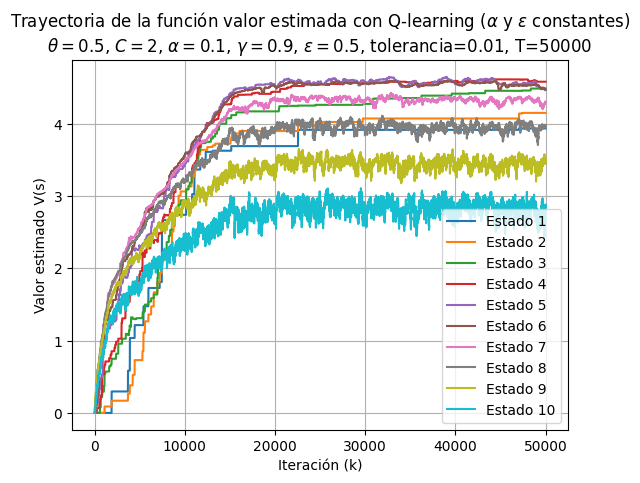

In [9]:
# parte 2a

# matriz que guarda en cada columna la funcion de valor evaluada 
# en estado igual al indice de la columna  
V_s = np.zeros((Q.shape[0],S))

for s in range(S):
    V_s[:,s] = np.min(Q[:,s,:], axis=1)
    plt.plot(V_s[:, s], label=f"Estado {s+1}")

titulo = "Trayectoria de la función valor estimada con Q-learning" + " " + r"($\alpha$ y $\epsilon$ constantes)"
parametros_q_learning_tray = fr"$\theta={theta}$, $C={C}$, $\alpha={alpha}$, $\gamma={gamma}$, $\epsilon={epsilon}$, tolerancia={tolerancia}, T={T}"

plt.xlabel("Iteración (k)")
plt.ylabel("Valor estimado V(s)")
plt.title(titulo + "\n" + parametros_q_learning_tray)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [10]:
def matrices_transicion(S,theta):
    # devuelve las matrices de transición
    P = [np.zeros((S,S)), np.zeros((S,S))]

    # matriz de transición para la acción a = 1 (reemplazar)
    for i in range(S):
        P[0][i][S-1] = 1.0

    # matriz de transición para la acción a = 2 (no reemplazar)
    for i in range(S):
        if i >= 1:
            P[1][i][i] = 1 - theta
            P[1][i][i - 1] = theta
        else:
            P[1][i][i] = 1.0  # el estado 0 se queda en 0 con probabilidad 1

    return P

In [11]:
def value_iteration_con_trayectoria(S, theta, C, gamma, tolerancia):
    V = np.zeros(S)
    trayectoria_V = []
    trayectoria_pi = []

    # Matrices de transición
    P = matrices_transicion(S, theta)

    # Costos
    c = np.zeros((S, 2))
    for s in range(S):
        c[s, 0] = cost(C, 0, s, S)
        c[s, 1] = cost(C, 1, s, S)

    delta = float('inf')
    V_new = np.zeros_like(V)

    while delta >= tolerancia:
        delta = 0

        # Calcular nuevo V
        for s in range(S):
            valores_accion_1 = np.sum(P[0][s]*(c[s,0]+gamma*V))
            valores_accion_2 = np.sum(P[1][s]*(c[s,1]+gamma*V)) 
            V_new[s] = min(valores_accion_1, valores_accion_2)

        # Actualizar
        delta = np.linalg.norm(V_new - V)
        V = V_new.copy()
        trayectoria_V.append(V.copy())

        # Calcular pi para esta iteración y guardarla
        pi_iter = np.zeros(S, dtype=int)
        for s in range(S):
            action_costs = []
            for a in [0, 1]:
                expected_cost = np.sum(P[a][s] * (c[s, a] + gamma * V))
                action_costs.append(expected_cost)
            pi_iter[s] = np.argmin(action_costs) + 1  # acciones 1 o 2

        trayectoria_pi.append(pi_iter.copy())

    return np.array(trayectoria_V), np.array(trayectoria_pi)


In [12]:
S = 10
theta = 0.5
C = 2
gamma = 0.9
tolerancia = 0.01

In [13]:
np.random.seed(42)

trayectoria_V, trayectoria_pi = value_iteration_con_trayectoria(S,theta,C,gamma,tolerancia)

In [14]:
trayectoria_V.shape

(48, 10)

In [15]:
trayectoria_pi.shape

(48, 10)

In [16]:
trayectoria_pi[-1]

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

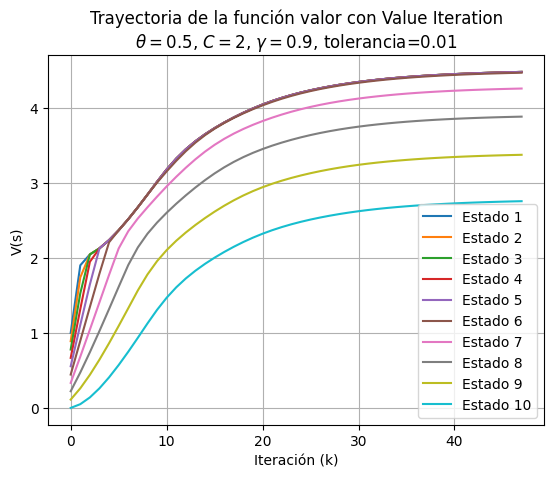

In [17]:
for s in range(S):
    plt.plot(trayectoria_V[:, s], label=f"Estado {s+1}")

titulo = "Trayectoria de la función valor con Value Iteration"
parametros_value_tray = fr"$\theta={theta}$, $C={C}$, $\gamma={gamma}$, tolerancia={tolerancia}"

plt.xlabel("Iteración (k)")
plt.ylabel("V(s)")
plt.title(titulo + "\n" + parametros_value_tray)
plt.legend()
plt.grid(True)
plt.show()

---

**Respuesta Parte 2b)**

Sí, se observa que el resultado del algoritmo de Q-learning sigue la trayectoria de la función de valor obtenida por Value Iteration. Ambos algoritmos intentan resolver el mismo problema de fondo: encontrar la función valor óptima que minimiza el costo acumulado esperado en un proceso de decisión de Markov.

En particular, Q-learning aproxima $Q(s,b)$ a través de interacciones con el entorno y de ahí se obtiene una estimación de la función de valor como $\hat{V}(s)=min_{b}Q(s,b)$. A medida que aumenta el número de iteraciones, esta estimación mejora, y se alinea cada vez más con la trayectoria que se obtiene usando Value Iteration, que utiliza el modelo completo del problema de forma determinista.

La similitud entre las trayectorias se vuelve más evidente cuando se entrena Q-learning por un número suficientemente alto de pasos, permitiendo visitar todos los estados muchas veces. Esto garantiza que los valores Q se ajusten correctamente y sigan la misma evolución que el algoritmo exacto.

---

---

**Respuesta Parte 2c)**

Sí, se observa que la varianza de Q-learning (es decir, la fluctuación de los valores estimados alrededor de su valor final) disminuye a medida que aumentan las iteraciones. Al comienzo, los valores de $Q(s,b)$ cambian drásticamente porque el algoritmo todavía está explorando y aprendiendo a partir de pocas muestras. Por eso, las curvas de $Q(s,b)$ son irregulares y ruidosas.

A medida que se acumulan más visitas a cada par (estado, acción), las actualizaciones se vuelven más pequeñas y estables, y los valores comienzan a converger. Las curvas se suavizan con el tiempo y tienden a estabilizarse.

En este caso, observando las gráficas, Q-learning comienza a estabilizarse alrededor de las 20.000 iteraciones. A partir de allí, aunque hay algo de ruido, los valores promedio por estado no cambian significativamente y el orden relativo entre estados se mantiene. Después de este punto, los valores ya están estabilizados, reflejando muy bien la forma de la función valor óptima obtenida por Value Iteration.

---

---

**Respuesta Parte 2d)**

Si el algoritmo de Q-learning se detiene en $k=10$, la política obtenida será muy mala. En ese punto, el algoritmo apenas ha comenzado a explorar el espacio de estados y acciones, y los valores $Q(s,b)$ son muy poco informativos.

Esto se refleja en la gráfica: durante las primeras iteraciones, no hay una separación clara entre los estados, y el orden relativo de los valores es errático. Esto significa que la política extraída elegiría acciones basadas en estimaciones altamente imprecisas.

Además, debido a la naturaleza estocástica del algoritmo (exploración aleatoria y transiciones probabilísticas), es posible que algunos estados ni siquiera hayan sido visitados aún. Por lo tanto, la política resultante no reflejará el comportamiento óptimo y puede incluso tomar decisiones muy malas.

En resumen, detener el algoritmo tan temprano lleva a una política muy subóptima, lo que demuestra la necesidad de ejecutar Q-learning durante una cantidad suficientemente grande de iteraciones para que las estimaciones de los valores y la política sean confiables.

---

In [18]:
# parte 3 - Q-learning

# Matriz que guarda en cada fila la politica optima para el paso dado por la fila 
A_k = np.zeros((Q.shape[0],S))

for s in range(S):
    A_k[:,s] = np.argmin(Q[:,s,:], axis=1) + 1

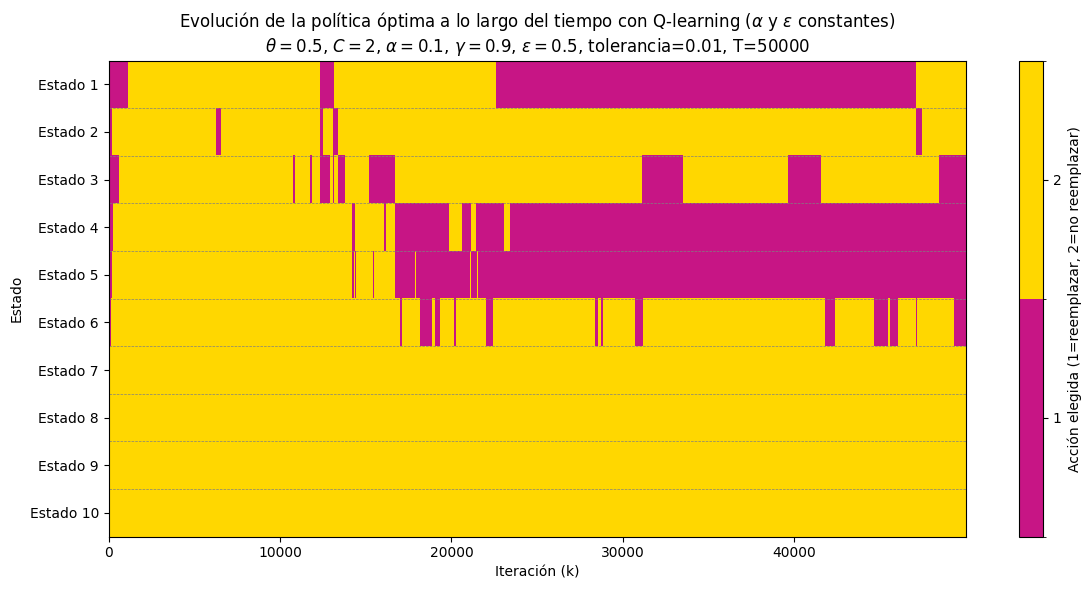

In [19]:
# Mapa de color con solo dos valores
cmap = ListedColormap(["mediumvioletred", "gold"])  # reemplazar, no reemplazar
bounds = [0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12, 6))
plt.imshow(A_k.T, aspect='auto', cmap=cmap, norm=norm, interpolation='none')
cbar = plt.colorbar(ticks=[1, 2])
cbar.set_label('Acción elegida (1=reemplazar, 2=no reemplazar)')

titulo = "Evolución de la política óptima a lo largo del tiempo con Q-learning" + " " + r"($\alpha$ y $\epsilon$ constantes)"

plt.xlabel("Iteración (k)")
plt.ylabel("Estado")
plt.yticks(range(S), [f"Estado {i+1}" for i in range(S)])
plt.title(titulo + "\n" + parametros_q_learning_tray)

# Agregar líneas horizontales entre estados
for y in range(1, S):
    plt.axhline(y - 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.grid(False)
plt.tight_layout()
plt.show()


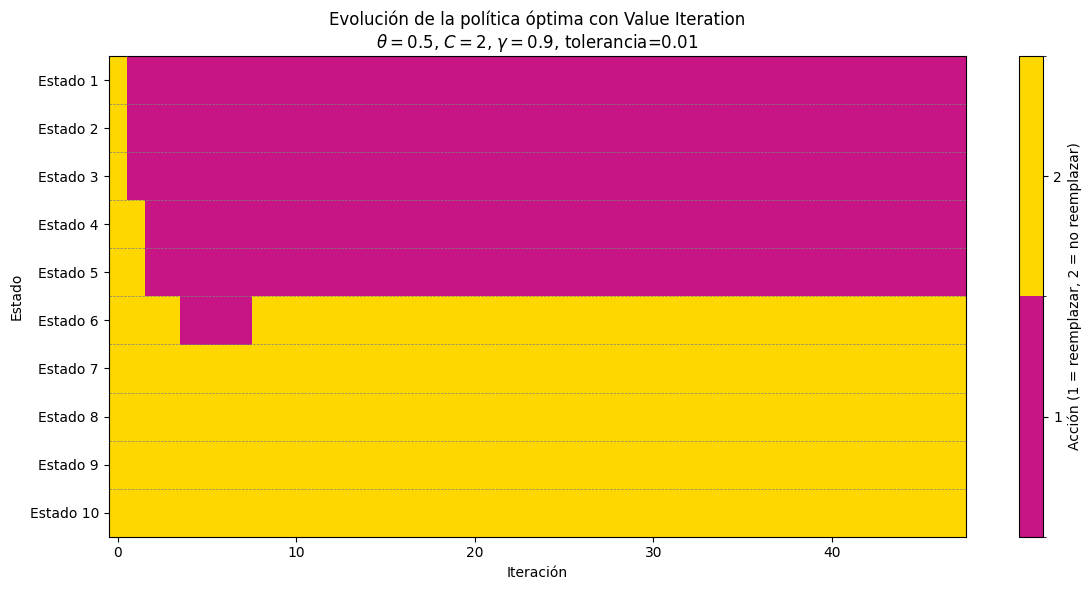

In [20]:
# parte 3 - Value Iteration

titulo = "Evolución de la política óptima con Value Iteration"

plt.figure(figsize=(12, 6))
plt.imshow(trayectoria_pi.T, aspect='auto', cmap=cmap, norm=norm, interpolation='none')
plt.colorbar(ticks=[1, 2], label='Acción (1 = reemplazar, 2 = no reemplazar)')
plt.xlabel("Iteración")
plt.ylabel("Estado")
plt.title(titulo + "\n" + parametros_value_tray)
plt.yticks(range(S), [f"Estado {i+1}" for i in range(S)])

# Líneas horizontales entre estados
for y in range(1, S):
    plt.axhline(y - 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


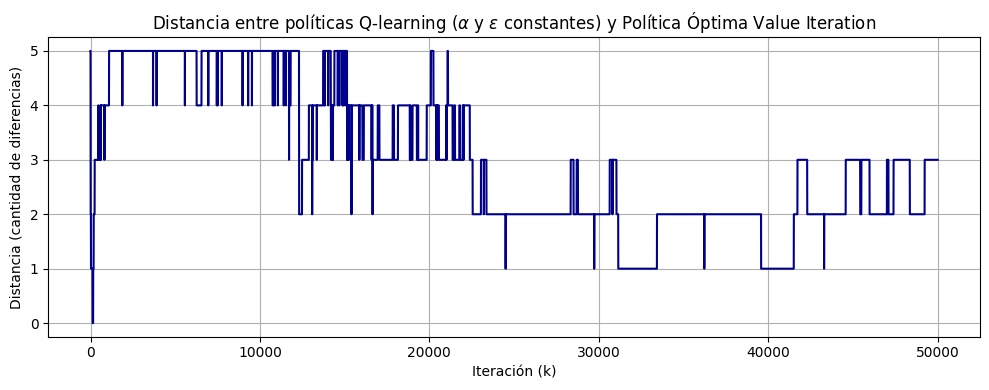

In [21]:
# Calculo la distancia en cada iteración k
distancia = np.sum(A_k != trayectoria_pi[-1], axis=1)

titulo = "Distancia entre políticas Q-learning" + " "+ r"($\alpha$ y $\epsilon$ constantes)"+ " " + "y Política Óptima Value Iteration"

plt.figure(figsize=(10, 4))
plt.plot(distancia, color='darkblue')
plt.xlabel("Iteración (k)")
plt.ylabel("Distancia (cantidad de diferencias)")
plt.title(titulo)
plt.grid(True)
plt.tight_layout()
plt.show()


---

**Respuesta Parte 3a)**

La gráfica de distancia entre políticas de Q-learning y Política Óptima Value Iteration muestra como las políticas de Q-learning se van acercando progresivamente a la política óptima obtenida con Value Iteration. Se estabiliza en distancias bajas a partir de valores de $k$ grandes, aunque con pequeñas oscilaciones (puede ser por el $\epsilon$-greedy). 

---

---

**Respuesta Parte 3b)**

A partir de $k\approx 25000$, la política generada por el algoritmo de Q-learning comienza a estabilizarse, con una distancia baja (1,2 o 3 diferencias) respecto a la política óptima obtenida por Value Iteration.
En esta etapa los cambios son menores, lo cual sugiere que la política es suficientemente buena como para implementarse en un escenario real, sin afectar significativamente la performance global.

---

In [22]:
# parte 3c

def Q_learning_decreasing_step_size(T, s_0, a_0, S, theta, C, gamma, alpha, epsilon, tolerancia, estabilidad_minima):

    # inicializar Q(s,a) 
    Q = np.zeros((T,S,2))
    
    s_k = s_0
    a_k = a_0
    
    acciones = np.zeros(T, dtype=int)
    acciones[0] = a_k

    convergio = False
    costo_acumulado_descuento = 0
    estabilidad = 0
    k = 0


    # visitas = np.zeros(S)  

    while (k<T-1 and estabilidad < estabilidad_minima):

        alpha_k = 1 / (k+1)
        epsilon_k = epsilon / ((k+1) ** (2/3))


        a_k = acciones[k]
        # 1 con probabilidad epsilon_k, 0 con probabilidad 1-epsilon_k
        explorar = np.random.binomial(1,epsilon_k)
    
        s_kmas1 = siguiente_estado(s_k, a_k, S, theta)

        # visitas[s_k] += 1


        costo_acumulado_descuento += (gamma**k)*cost(C,a_k,s_k,S)
        
        Q[k+1] = Q[k].copy()
        Q[k+1,s_k,a_k] = Q[k,s_k,a_k] + alpha_k*(cost(C,a_k,s_k,S)+gamma*np.min(Q[k,s_kmas1,:])-Q[k,s_k,a_k])

        convergio = np.abs(Q[k+1,s_k,a_k] - Q[k,s_k,a_k]) <= tolerancia

        if convergio:
            estabilidad += 1
        else:
            estabilidad = 0    
 
        s_k = s_kmas1
        
        if explorar == 1:
            # exploro, sorteo con distribucion uniforme 
            a_k = np.random.randint(0, 2)
    
        else:
            # exploto 
            a_k = np.argmin(Q[k+1,s_kmas1,:])
            
        acciones[k+1] = a_k 

        k += 1
        
        if estabilidad == estabilidad_minima:
            print(k)

    Q_final = Q[:k+1].copy()
    acciones_final = acciones[:k+1].copy()

    # pi_opt = np.argmin(Q_final[-1], axis=1)
    # print("Política aprendida por Q-learning:")
    # print(pi_opt)

    # print("Visitas por estado:")
    # print(visitas)


        
    return Q_final, acciones_final, costo_acumulado_descuento

In [23]:
S = 10
tolerancia = 0.01
estabilidad_minima = 10
T = 40
s_0 = S-1
a_0 = 1
theta = 0.5
C = 2
gamma = 0.9
alpha = 0.1
epsilon = 0.5

In [24]:
np.random.seed(42)

Q, acciones, costo_acumulado_descuento = Q_learning_decreasing_step_size(T,s_0,a_0,S,theta,C,gamma,alpha,epsilon,tolerancia,estabilidad_minima)

In [25]:
Q[-1]

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.07420361, 0.        ],
       [0.18204684, 0.06836987],
       [0.25      , 0.05768063],
       [1.        , 0.0666503 ],
       [0.66666667, 0.00700027]])

In [26]:
Q.shape

(40, 10, 2)

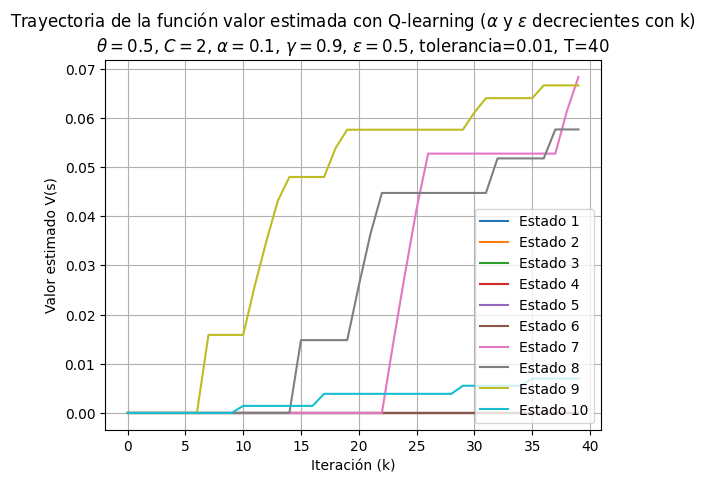

In [27]:
# matriz que guarda en cada columna la funcion de valor evaluada 
# en estado igual al indice de la columna  
V_s = np.zeros((Q.shape[0],S))

for s in range(S):
    V_s[:,s] = np.min(Q[:,s,:], axis=1)
    plt.plot(V_s[:, s], label=f"Estado {s+1}")

titulo = "Trayectoria de la función valor estimada con Q-learning" + " " + r"($\alpha$ y $\epsilon$ decrecientes con k)"
parametros_q_learning_tray_decreasing = fr"$\theta={theta}$, $C={C}$, $\alpha={alpha}$, $\gamma={gamma}$, $\epsilon={epsilon}$, tolerancia={tolerancia}, T={T}"

plt.xlabel("Iteración (k)")
plt.ylabel("Valor estimado V(s)")
plt.title(titulo + "\n" + parametros_q_learning_tray_decreasing)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [28]:
# Matriz que guarda en cada fila la politica optima para el paso dado por la fila 
A_k = np.zeros((Q.shape[0],S))

for s in range(S):
    A_k[:,s] = np.argmin(Q[:,s,:], axis=1) + 1

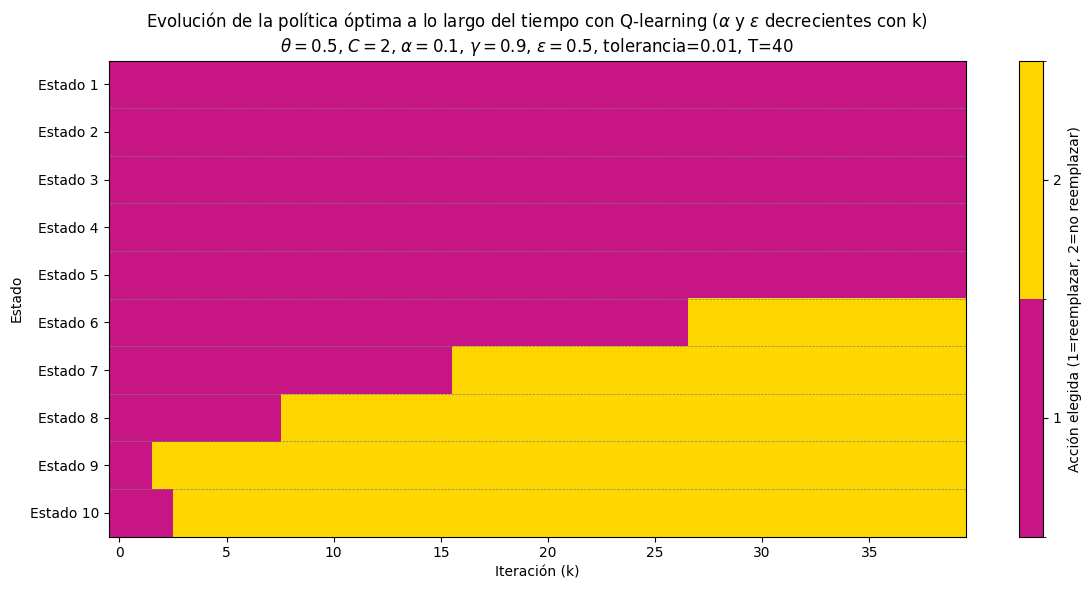

In [29]:
# Mapa de color con solo dos valores
cmap = ListedColormap(["mediumvioletred", "gold"])  # reemplazar, no reemplazar
bounds = [0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12, 6))
plt.imshow(A_k.T, aspect='auto', cmap=cmap, norm=norm, interpolation='none')
cbar = plt.colorbar(ticks=[1, 2])
cbar.set_label('Acción elegida (1=reemplazar, 2=no reemplazar)')

titulo = "Evolución de la política óptima a lo largo del tiempo con Q-learning" + " " + r"($\alpha$ y $\epsilon$ decrecientes con k)"

plt.xlabel("Iteración (k)")
plt.ylabel("Estado")
plt.yticks(range(S), [f"Estado {i+1}" for i in range(S)])
plt.title(titulo + "\n" + parametros_q_learning_tray_decreasing)

# Agregar líneas horizontales entre estados
for y in range(1, S):
    plt.axhline(y - 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.grid(False)
plt.tight_layout()
plt.show()


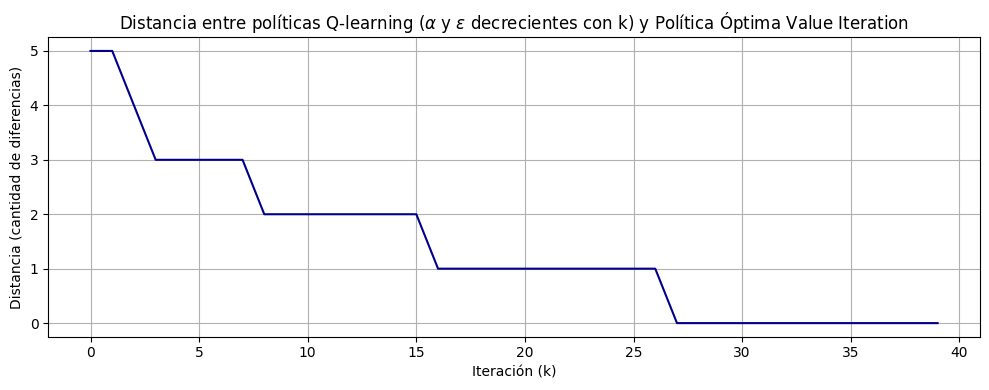

In [30]:
# Calculo la distancia en cada iteración k
distancia = np.sum(A_k != trayectoria_pi[-1], axis=1)

titulo = "Distancia entre políticas Q-learning" + " "+ r"($\alpha$ y $\epsilon$ decrecientes con k)"+ " " + "y Política Óptima Value Iteration"

plt.figure(figsize=(10, 4))
plt.plot(distancia, color='darkblue')
plt.xlabel("Iteración (k)")
plt.ylabel("Distancia (cantidad de diferencias)")
plt.title(titulo)
plt.grid(True)
plt.tight_layout()
plt.show()


---

**Respuesta Parte 3c)**

Al reemplazar la tasa de aprendizaje por $\alpha_k=\frac{1}{k}$ y la de exploración por $\epsilon_k=\frac{\epsilon}{k^{2/3}}$, el algoritmo de Q-learning logra una convergencia mucho más rápida y suave. 

Por tanto, en contraste con la respuesta a 2d (donde la política era mala si el algoritmo se detenía en $k=10$), ahora ya se obtiene una política muy cercana a la óptima en menos de 50 pasos, haciéndola viable en escenarios reales con menos costo computacional.

Esto se refleja en la trayectoria de la distancia entre políticas de Q-learning y política óptima de Value Iteration, que se estabiliza rápidamente en menos de 50 iteraciones.

---

In [31]:
# parte 4a

def simular_politica_umbral(s_star, S, theta, C, gamma, T=1000):
    
    s = S - 1  # estado inicial: máquina nueva
    total_cost = 0.0

    for t in range(T):
        # política umbral
        a = 0 if s < s_star else 1
        
        c = cost(C, a, s, S)
        total_cost += (gamma ** t) * c

        s = siguiente_estado(s, a, S, theta)

    return total_cost

In [32]:
np.random.seed(42)

simulaciones_por_umbral = 100
costos_promedio = []

for s_star in range(S):
    costos = [simular_politica_umbral(s_star, S, theta, C, gamma) for _ in range(simulaciones_por_umbral)]
    costos_promedio.append(np.mean(costos))

In [33]:
# parte 4b

costos_promedio

[np.float64(4.076013498926856),
 np.float64(3.3193712078841013),
 np.float64(3.2165018256014775),
 np.float64(3.172826347181301),
 np.float64(2.9054255727874714),
 np.float64(2.795649641665645),
 np.float64(2.8133324595987887),
 np.float64(3.029343563957026),
 np.float64(3.764462301139588),
 np.float64(6.116470214131572)]

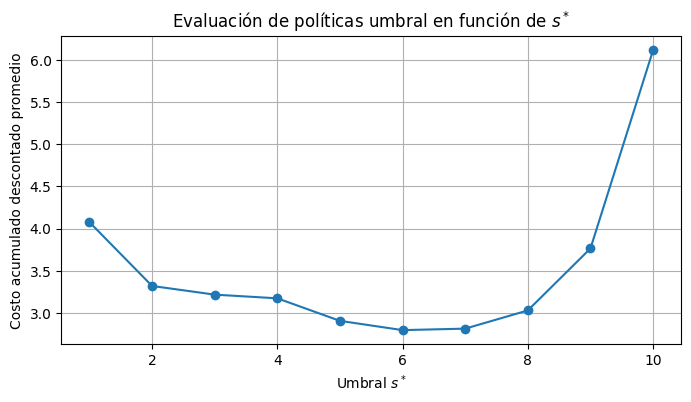

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,S+1), costos_promedio, marker='o')
plt.xlabel("Umbral $s^*$")
plt.ylabel("Costo acumulado descontado promedio")
plt.grid(True)
plt.title("Evaluación de políticas umbral en función de $s^*$")
plt.show()

In [35]:
mejor_umbral = np.argmin(costos_promedio)
mejor_costo = costos_promedio[mejor_umbral]
print(f"Mejor umbral: s* = {mejor_umbral + 1}, con costo promedio = {mejor_costo:.4f}")

Mejor umbral: s* = 6, con costo promedio = 2.7956


In [36]:
def costo_simular_politica(pi, S, theta, C, gamma, T=100):
    
    s = S - 1  # estado inicial: máquina nueva
    total_cost = 0.0

    for t in range(T):
        # política umbral
        a = pi[s] - 1
        
        c = cost(C, a, s, S)
        total_cost += (gamma ** t) * c

        s = siguiente_estado(s, a, S, theta)

    return total_cost

In [37]:
# Matriz que guarda en cada fila la politica optima para el paso dado por la fila 
A_k = np.zeros((Q.shape[0],S))

for s in range(S):
    A_k[:,s] = np.argmin(Q[:,s,:], axis=1) + 1

In [38]:
A_k.shape

(40, 10)

In [39]:
politica_optima_q_learning = A_k[-1]
politica_optima_q_learning

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2.])

In [40]:
np.random.seed(42)

simulaciones_por_umbral = 100

costos_q_learning = [costo_simular_politica(politica_optima_q_learning, S, theta, C, gamma) for _ in range(simulaciones_por_umbral)]
costo_promedio_q_learning = np.mean(costos_q_learning)

In [41]:
# parte 4b

costo_promedio_q_learning

np.float64(2.787137268956414)

---

**Respuesta Parte 4b**

El mejor umbral es $s^{*}=6$ porque para ese algoritmo se obtiene el costo acumulado descontado menor. El algoritmo que usa política tipo umbral y el algoritmo con la política aprendida por Q-learning obtuvieron el mismo costo final (aproximadamente 2.8), esto indica que el algoritmo de Q-learning llegó a aprender esa política umbral óptima subyacente.

---